**Proyecto Tienda de Video Juegos ICE **

Primera Fase - Preparar datos

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/datasets/games.csv')
# Reeplazar el nombre de las comlunas (ponerlas en minusculas)

df.columns = df.columns.str.lower()

# Se convirtio en numero  entero por que el año no debe contener descimales.

df.dropna(subset=['year_of_release'],inplace=True)
df['year_of_realese'] = df['year_of_release'].astype(int)

# Se reemplaza 'tbd' (To be determinated) por NaN y se convierte la columna a tipo float.

df['user_score'] = df['user_score'].replace('tbd',np.nan)
df['user_score'] = df['user_score'].astype(float)

# Los valores ausentes en 'rating' se rellenan con 'NR' (Not Rated)

df['rating'].fillna('NR',inplace=True)

# Calcular las ventas totales sumando las ventas de todas las regiones

df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
print('---Primeras 5 filas del dataframe procesado---')
print(df.head())
print('---Informacion y tipos de datos del dataframe---')
df.info()



---Primeras 5 filas del dataframe procesado---
                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1      3.58      6.81         0.77           NaN         NaN     NR   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
4      8.89     10.22         1.00           NaN         NaN     NR   

   year_of_realese  total_sales  
0    

Explicacion:

Conversion de tipo de datos, en la columna de year_of_release era de tipo float debido a la prescencia
de valores ausentes. Se convirtio a tipo int, por que los años no tiene descimales. En la columna user_score
esa columna era de tipo object por tener el valor TBD, para tratarla como una variable numerica, se reemplazo
por un valor nulo (NaN) y se convirtio a tipo float.


    Valores ausentes, en el caso de la columna year_of_release se eliminaron las filas con los años ausentes
ya que pudieran de tratarse de juegos muy antiguos y por ende los datos no estaban digitalizados completamente.

    En las critic_score y user_score, ahi notamos que tiene una cantidad significativa de valores ausentes.
Probablemnte sea por que varios juegos son algo antiguos o de nichos muy especificos y nunca han recibido una
puntuacion de la critica o de un numero suficiente de usuarios. Decidi dejarlos como valores nulos por ahora.
Rellenarlos con un 0 o una media podria distorcionar el analisis, ya que sin una puntuacion no significaria
puntuacion 0.

    La abreviatura TBD la manejaremos como valor ausente, ya que el juego aun no recibe suficiente puntuacion.

    Se calcularon las ventas de todas las regiones, se creo una nueva columna total_sales que suma las columnas
na_sales, eu_sales, jp_sales, y other_sales, esto es para tener una vision global.

**Análisis de Lanzamientos por Año**

1.   Paso agrupar y contar: Tomamos nuestro conjunto de datos y los agrupamos por columna year_of_release. Para cada año, simplemente contamos cuántos juegos aparecen. Esto nos dará un recuento anual de lanzamientos.
2.  Visualizar: Los números por sí solos pueden ser difíciles de interpretar. Por eso, crearemos un gráfico de barras. La visualización es una de las herramientas más poderosas de un analista, ya que nos permite ver tendencias de un solo vistazo que podrían estar ocultas en una tabla.


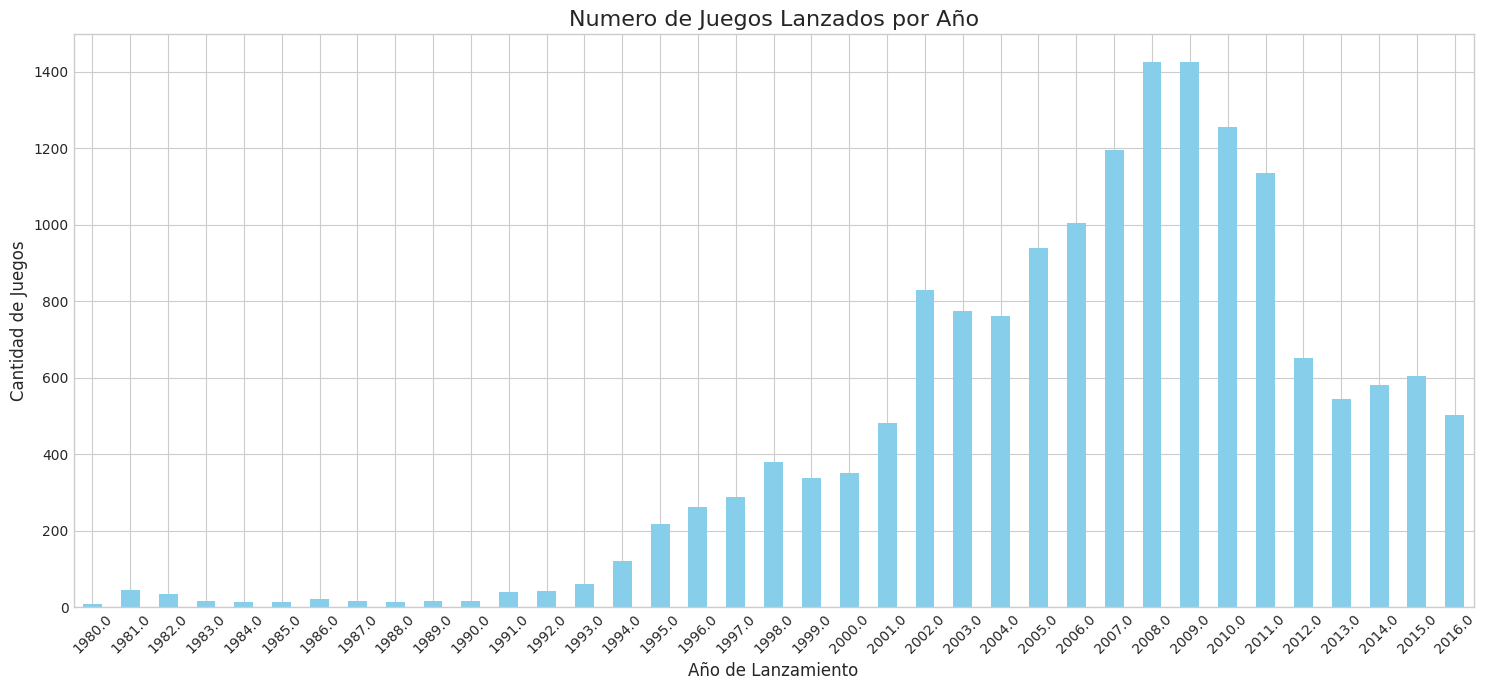

In [ ]:
# Analisis de datos

import matplotlib.pyplot as plt

df = pd.read_csv('/datasets/games.csv')
df.columns = df.columns.str.lower()
df.dropna(subset=['year_of_release'],inplace=True)
df['year_of_realese'] = df['year_of_release'].astype(int)

# Agrupacion por año y contar con el numero de juegos.
games_per_year = df.groupby('year_of_release')['name'].count()

# Visualizacion
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15,7))
games_per_year.plot(kind='bar',color='skyblue')

plt.title('Numero de Juegos Lanzados por Año',fontsize=16)
plt.xlabel('Año de Lanzamiento', fontsize=12)
plt.ylabel('Cantidad de Juegos', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
¿Son significativos los datos de cada período?
Los datos relevantes serian los mas recientes del 2002-2011 es donde mas notoriamente se ve un crecimiento
que alcanza su punto maximo en el 2008-09, aunque en el 2012-2016 hay una ligera caida de lazamientos registrados.

El objetivo es generar una campaña para el 2017 entonces tomaria los datos del 2002 al 2016.

**El Ciclo de Vida de las Plataformas**

1. Identificar a los "Titanes": Primero, necesitamos saber cuáles han sido las plataformas más exitosas de la historia en términos de ventas de juegos. Agruparemos todo nuestro conjunto de datos por plataforma y sumaremos sus ventas totales para crear un ranking.
2. Trazar sus Historias: Una vez que tengamos a nuestros "titanes", no nos basta con saber que vendieron mucho en total; necesitamos ver cuándo lo hicieron. Para ello, construiremos un gráfico de líneas que muestre las ventas anuales de cada una de estas plataformas a lo largo del tiempo. Cada línea en el gráfico representará la historia de una consola: su nacimiento, su apogeo y su inevitable declive.

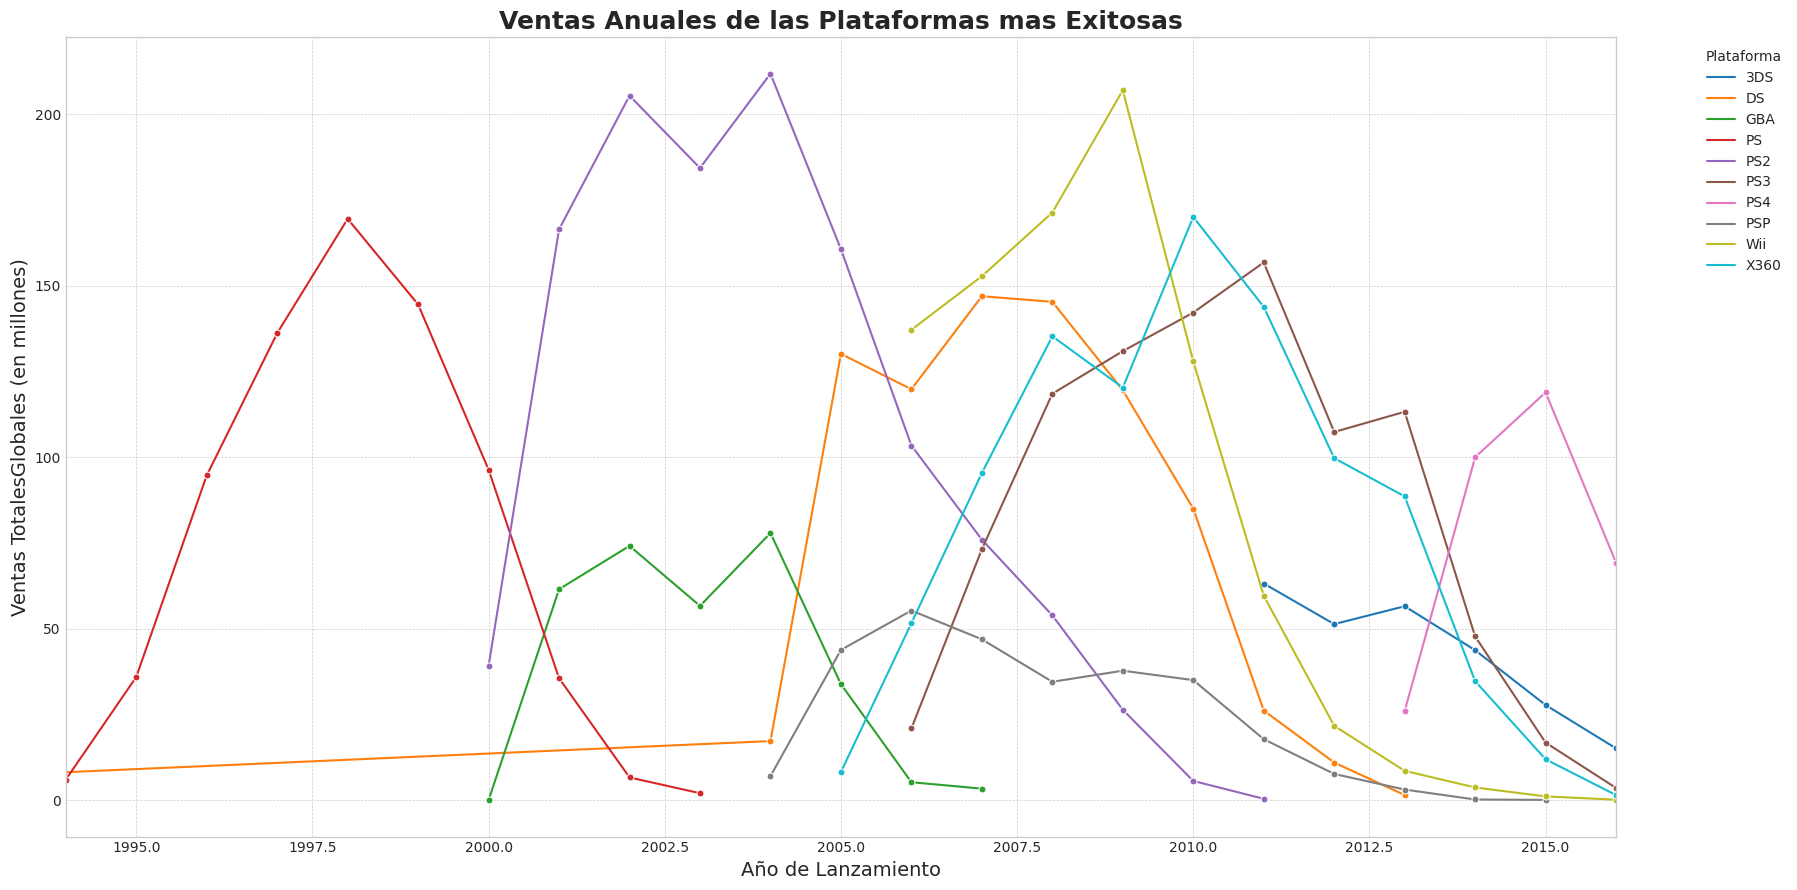

In [ ]:
import seaborn as sns

df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

# Encontrar las plataformas con mayores ventas totales.
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_platforms_names = platform_sales.head(10).index

# Construir una distribucion de ventas por año para estas plataformas

top_platforms_df = df[df['platform'].isin(top_platforms_names)]
yearly_sales_pivot = top_platforms_df.pivot_table(
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
)
# Visualizacion
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(18,9))
sns.lineplot(data=yearly_sales_pivot,dashes=False,marker='o',markersize=5)
plt.title('Ventas Anuales de las Plataformas mas Exitosas',fontsize=18,weight='bold')
plt.xlabel('Año de Lanzamiento',fontsize=14)
plt.ylabel('Ventas TotalesGlobales (en millones)',fontsize=14)
plt.legend(title='Plataforma',bbox_to_anchor=(1.05,1),loc='upper left')
plt.xlim(1994,2016)
plt.grid(True,which='both',linestyle='--',linewidth=0.5)
plt.tight_layout()
plt.show()

In [ ]:
¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
    Fase de crecimiento: 2-3 años: Desde su lanzamiento, una nueva plataforma tarda aproximadamentes de 2 a 3 años.
esto puduera deberse a la creacion de un catalogo de juegos atractivo para el publico objetivo.

    Fase de madurez 4-6 años: Esto es cuando la plataforma alcanza su popularidad.Durante este tiempo, es cuando registran
sus mayores ventas y dominan el mercado.

    Fase de declibe 2-3 años: Esto sucede con el nuevo lanzamiento de una nueva consola de videojuegos, las ventas de juegos
de esa plataforma caen drasticamente.


In [ ]:
    El periodo de datos mas relevante y estrategico solido para construir un modelo predictivo para el 2017 es
del año 2013 al 2016.

    El 2013 fue el año en el que lanzaron nuevas consolas (PS4,XONE).Esto nos permitira capturar el comienzo y el declive
de la generacion anterior. Este periodo de 4 años nos proporcionara un panorama claro del mercado dominado por las plataformas
que seran clave para nuestro objetivo 2017.

**Identificando las Plataformas Líderes Actuales**

1. Filtrar los Datos: El primer paso es crear un nuevo conjunto de datos que contenga únicamente la información de los juegos lanzados a partir de 2013.
2. Analizar las Tendencias Anuales: Vamos a crear un gráfico de líneas, similar al anterior, pero que se centre únicamente en los años 2013 a 2016. Esto nos dará una visión mucho más clara y detallada de la batalla de consolas en la era moderna, mostrando quién está ganando terreno y quién lo está perdiendo año tras año

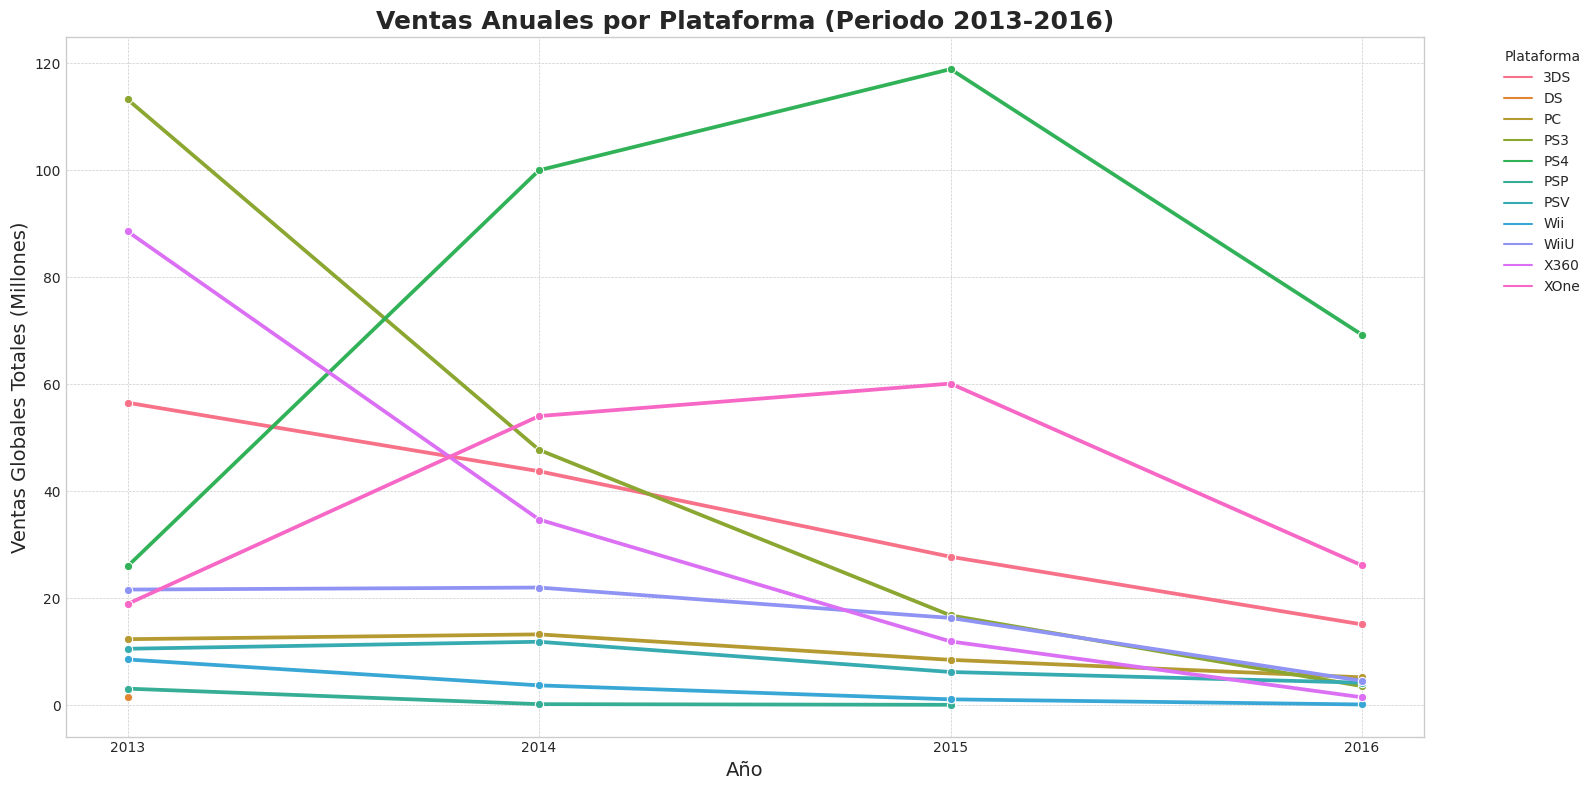

In [ ]:
# Filtar los datos para el periodo relevante 2013 en adelante

df_relevant = df[df['year_of_release'] >=2013].copy()

# Tabla dinamica para ver las ventas anuales por plataforma dentro de este periodo.

platform_annual_sales = df_relevant.pivot_table(
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
)
# Visualizar las tendencias.
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(16,8))
sns.lineplot(data=platform_annual_sales, dashes=False, marker='o', markersize=6,linewidth=2.7)
plt.title('Ventas Anuales por Plataforma (Periodo 2013-2016)',fontsize=18,weight='bold')
plt.xlabel('Año',fontsize=14)
plt.ylabel('Ventas Globales Totales (Millones)',fontsize=14)
plt.legend(title='Plataforma',bbox_to_anchor=(1.05,1),loc='upper left')
plt.xticks([2013,2014,2015,2016])
plt.grid(True,which='both',linestyle='--',linewidth=0.5)
plt.tight_layout()
plt.show()

**¿Cómo son las Ventas en las Plataformas Líderes?**

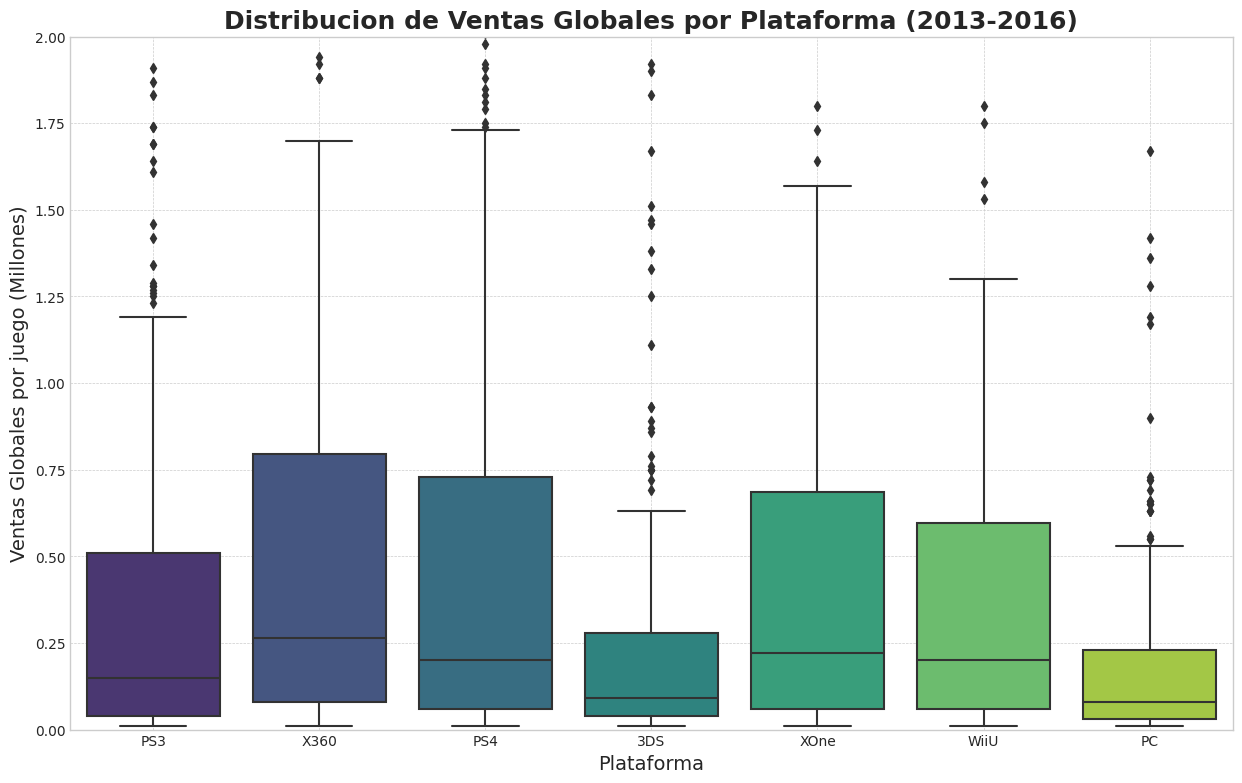

In [ ]:
# Plataformas mas relevantes de este periodo para la comparacion

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar y limpiar los datos
df = pd.read_csv('/datasets/games.csv')
df.columns = df.columns.str.lower()
df.dropna(subset=['year_of_release'], inplace=True)
df['year_of_release'] = df['year_of_release'].astype(int)
df['user_score'] = df['user_score'].replace('tbd', np.nan).astype(float)
df['rating'].fillna('NR', inplace=True)
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

# Filtrar para el período relevante (2013 en adelante)
df_relevant = df[df['year_of_release'] >= 2013].copy()

# Seleccionar las plataformas más relevantes de este período para la comparación
platforms_for_boxplot = ['PS4', 'XOne', '3DS', 'WiiU', 'PC', 'PS3', 'X360']
df_boxplot = df_relevant[df_relevant['platform'].isin(platforms_for_boxplot)]

# Diagrama de caja
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15,9))
sns.boxplot(x='platform',y='total_sales',data=df_boxplot,palette='viridis')
plt.title('Distribucion de Ventas Globales por Plataforma (2013-2016)',fontsize=18,weight='bold')
plt.xlabel('Plataforma',fontsize=14)
plt.ylabel('Ventas Globales por juego (Millones)',fontsize=14)
plt.ylim(0,2)
plt.grid(True,which='both',linestyle='--',linewidth=0.5)
plt.show()

¿Son significativas las diferencias en las ventas?
    Si, las diferencias son significativas.
¿Qué sucede con las ventas promedio en varias plataformas?
    Las plataformas de la generacion actual (PS4,XOne,WiiU), tienen las medias de ventas mas altas. Un juego promedio
de esas plataformas genera mas ingresos. Las consolas PS4 y la XOne estan muy a la par en este sentido.
la consola 3DS tiene una media considerable para ser una consola portatil.El PC tiene una media mas baja, esto es debido
a la inmensa cantidad de juegs de bajo perfil que lanzan en esa plataforma.

Hallazgos: Como se puede ver en la grafica los lideres del mercado son el PS4, XOne, y WiiU, esto indica que el verdadero
negocio esta en estas 3 consolas. Por otra parte el mercado de la PC tiene una larga cola de valores atipicos, podria ser
que los juegos que venden son de un nicho muy pequeño.
    

**Reseñas vs. Ventas en PS4**

1. Aislar los Datos: Primero, crearé un subconjunto de datos que contenga únicamente los juegos de PS4 de nuestro período relevante (2013-2016).

2. Visualizar la Relación: La mejor herramienta para ver la relación entre dos variables numéricas es un gráfico de dispersión (scatter plot). Crearemos dos de ellos: Ventas Totales vs. Puntuación de la Crítica (critic_score).
Ventas Totales vs. Puntuación de los Usuarios (user_score).
Cada punto en el gráfico representará un juego. Su posición horizontal dependerá de su puntuación y su posición vertical de cuántas copias vendió.

Correlacion entre Puntuacion de la Critica y Ventas en PS4: 0.41
Correlacion entre Puntuacion de Usuarios y Ventas en PS4:-0.03


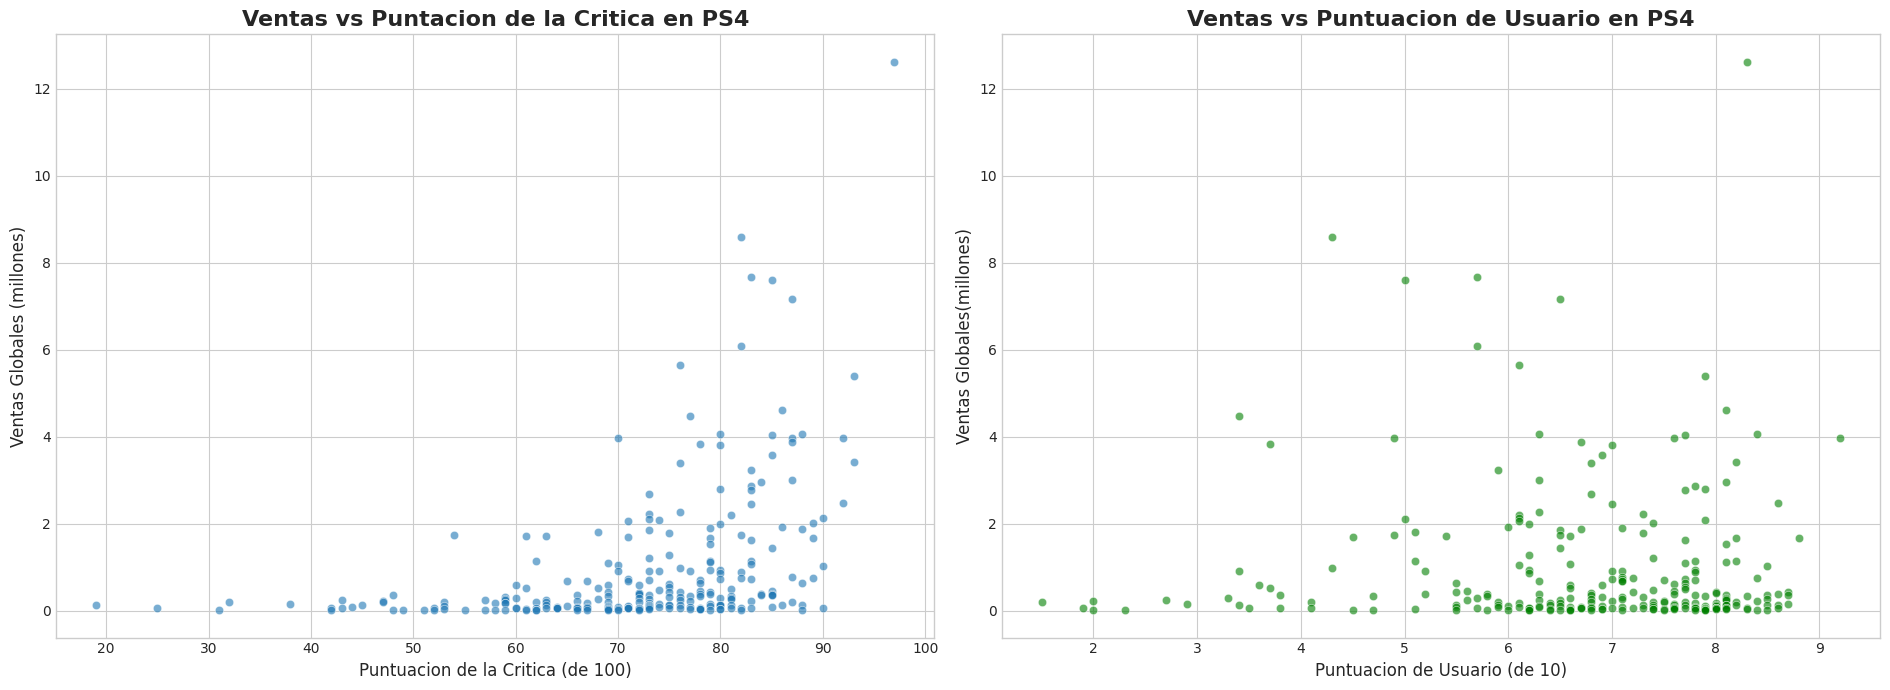

In [ ]:
# Filtar para el pediodo reevelante
df_relevant = df[df['year_of_release']>= 2013].copy()
df_relevant['user_score'] = df_relevant['user_score'].replace('tbd',np.nan).astype(float)

#Aislar los datos de la PS4 y eliminar filas sin puntuaciones para el analisis de correlacion
df_ps4 = df_relevant[df_relevant['platform'] == 'PS4'].dropna(subset=['critic_score','user_score']).copy()

#Calcular correlacion
corr_critic = df_ps4['critic_score'].corr(df_ps4['total_sales'])
corr_user = df_ps4['user_score'].corr(df_ps4['total_sales'])

print(f"Correlacion entre Puntuacion de la Critica y Ventas en PS4: {corr_critic:.2f}")
print(f"Correlacion entre Puntuacion de Usuarios y Ventas en PS4:{corr_user:.2f}")

# Grafico de dispersion
plt.style.use('seaborn-whitegrid')
fig,axes = plt.subplots(1,2, figsize=(19,7))

# Grafico para Puntuacion de la Critica
sns.scatterplot(ax=axes[0],x='critic_score',y='total_sales',data=df_ps4,alpha=0.6)
axes[0].set_title('Ventas vs Puntacion de la Critica en PS4',fontsize=16,weight='bold')
axes[0].set_xlabel('Puntuacion de la Critica (de 100)',fontsize=12)
axes[0].set_ylabel('Ventas Globales (millones)',fontsize=12)

#Grafico para Puntuacion de Usuario
sns.scatterplot(ax=axes[1],x='user_score',y='total_sales',data=df_ps4,alpha=0.6,color='green')
axes[1].set_title('Ventas vs Puntuacion de Usuario en PS4',fontsize=16,weight='bold')
axes[1].set_xlabel('Puntuacion de Usuario (de 10)',fontsize=12)
axes[1].set_ylabel('Ventas Globales(millones)',fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# Puntuacion de la Critica VS Ventas
  En el grafico del lado izquierdo, se puede apreciar una tendencia, esto quiere decir que a medida que nos movemos a la derecha
mejor es la puntuacion critica.
La correlacion de (0.41) indica una correlacion positiva, esto significa que en general a mejores reseñas de los profesionales
mayores son las ventas.
La correlacion de (-0.03) indica esta cerca del cero, lo que significa que no hay una correlacion lineal significativa entre la puntuacion
de los usuarios y las ventas.
En terminos generales las reseñas de los profesionales son un indicador de venta mucho mas creible que la de los usuarios.Por otra
parte las puntuaciones de los usuarios pueden ser mas volatiles y al parecer no son un buen indicador del rendimiento comercial de un juego.

IndentationError: unexpected indent (1570865427.py, line 3)

**Duelo de Plataformas**

1. Identificar los Juegos Comunes: Primero, identificaré la lista de juegos que existen en ambas plataformas en nuestro conjunto de datos.
2. Seleccionar los Más Exitosos: De esa lista, elegiré algunos de los títulos más vendidos para que la comparación sea significativa y fácil de visualizar.

*   Crear un Gráfico Comparativo: Un gráfico de barras agrupadas es la herramienta perfecta aquí. Para cada juego, tendremos dos barras una al lado de la otra: una para las ventas en PS4 y otra para las ventas en Xbox One. Esto hará que la diferencia sea visualmente inmediata.

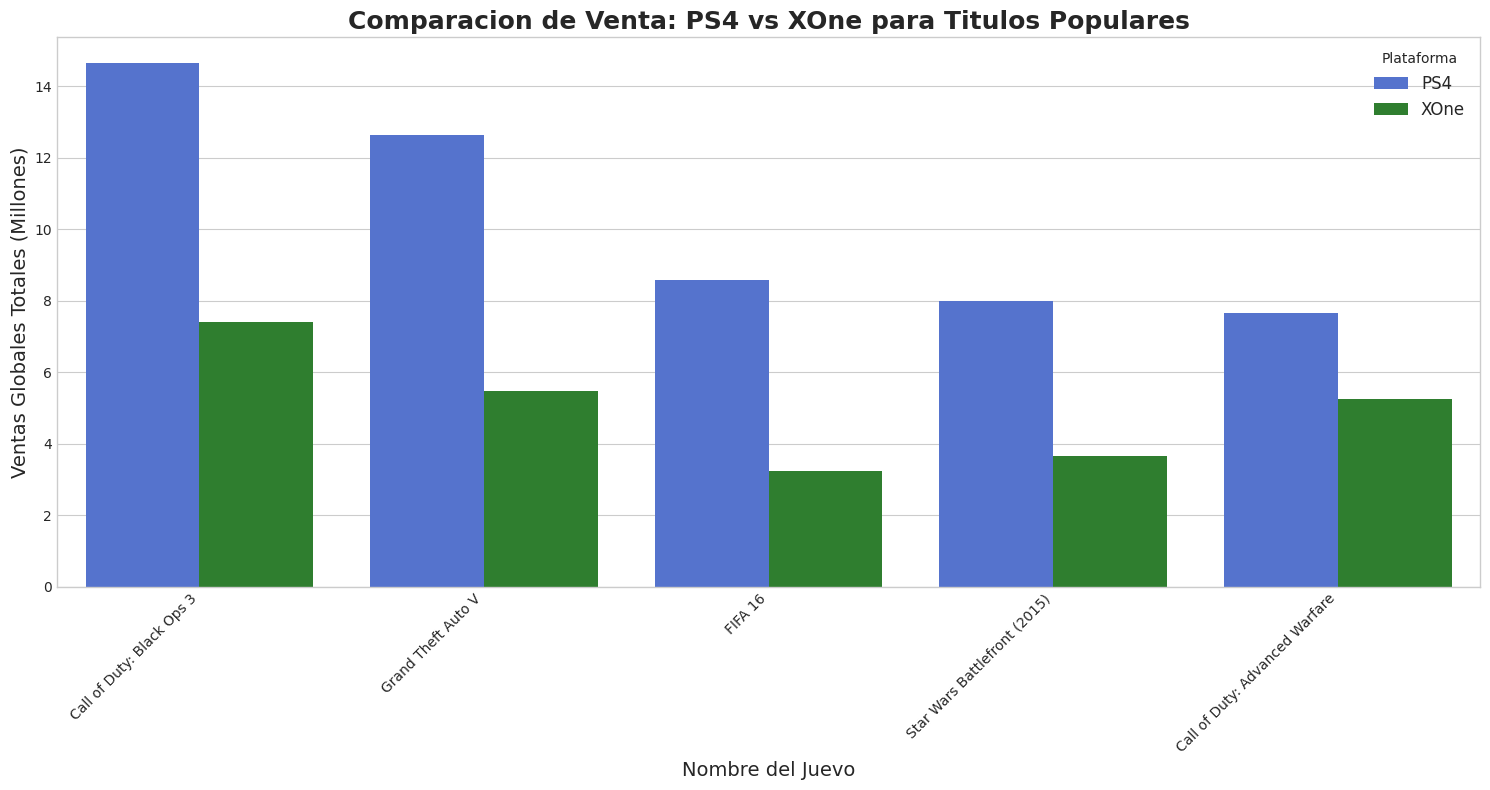

In [ ]:
df = pd.read_csv('/datasets/games.csv')
df.columns = df.columns.str.lower()
df.dropna(subset=['year_of_release'], inplace=True)
df['year_of_release'] = df['year_of_release'].astype(int)
df['user_score'] = df['user_score'].replace('tbd', np.nan).astype(float)
df['rating'].fillna('NR', inplace=True)
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

# Filtrar para el período relevante (2013 en adelante)
df_relevant = df[df['year_of_release'] >= 2013].copy()

# Identificar los juegos que estan en PS4 y XOne
ps4_game = df_relevant[df_relevant['platform'] == 'PS4']['name']
xone_game = df_relevant[df_relevant['platform']== 'XOne']['name']
multiplatform_games_set=set(ps4_game) & set (xone_game)

# Filtrar el dataframe para incluir solo estos juegos
df_multiplatform = df_relevant[
    (df_relevant['name'].isin(multiplatform_games_set)) &
    (df_relevant['platform'].isin(['PS4','XOne']))
]

# Encontrar los 5 juegos multiplataforma mas vendidos
top_5_multiplatform_names = df_multiplatform.groupby('name')['total_sales'].sum().nlargest(5).index

# Filtrar el dataframe
df_examples = df_multiplatform[df_multiplatform['name'].isin(top_5_multiplatform_names)]

#Creacion de grafico de barras
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15,8))
sns.barplot(x='name',y='total_sales',hue='platform',data=df_examples,palette={'PS4': 'royalblue','XOne': 'forestgreen'})
plt.title('Comparacion de Venta: PS4 vs XOne para Titulos Populares',fontsize=18,weight='bold')
plt.xlabel('Nombre del Juevo',fontsize=14)
plt.ylabel('Ventas Globales Totales (Millones)',fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Plataforma',fontsize=12)
plt.tight_layout()
plt.show()

**Popularidad: ¿Dónde está la Acción (y la Competencia)?**  
Primero, veamos un recuento simple de cuántos juegos se han lanzado por género en nuestro período de 2013-2016. Esto nos dirá qué géneros son los más comunes.

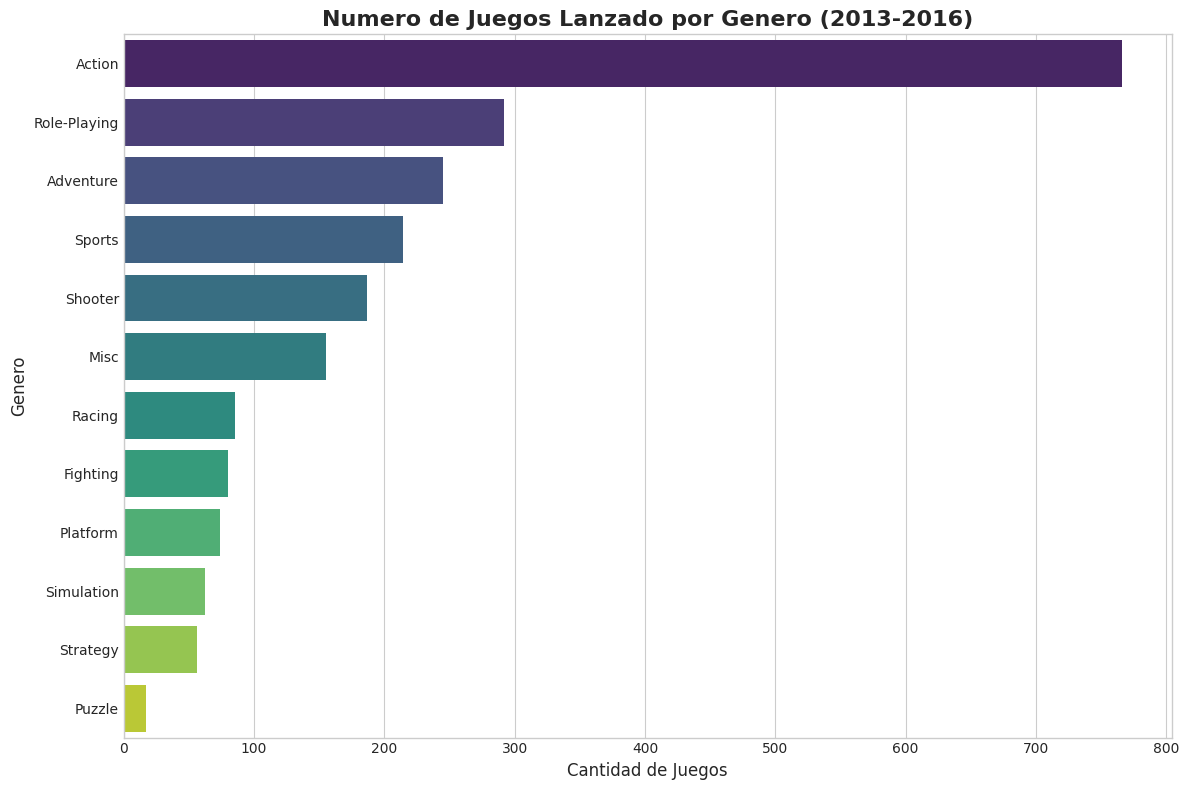

In [ ]:
# Popularidad : conteo de juegos por genero
genre_count = df_relevant['genre'].value_counts()
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12,8))
sns.barplot(x=genre_count.values, y=genre_count.index, palette='viridis',orient='h')
plt.title('Numero de Juegos Lanzado por Genero (2013-2016)',fontsize=16,weight='bold')
plt.xlabel('Cantidad de Juegos',fontsize=12)
plt.ylabel('Genero',fontsize=12)
plt.tight_layout()
plt.show()

¿Qué se puede decir de los géneros más rentables? Los juegos de Accion domina en terminos de cantidad.Se lanzan muchos
muchos juegos de accion que de caulquier otro tipo. Seguidos por los generos ROL(Role-Playing), Aventura, Deportes, y Shooter.

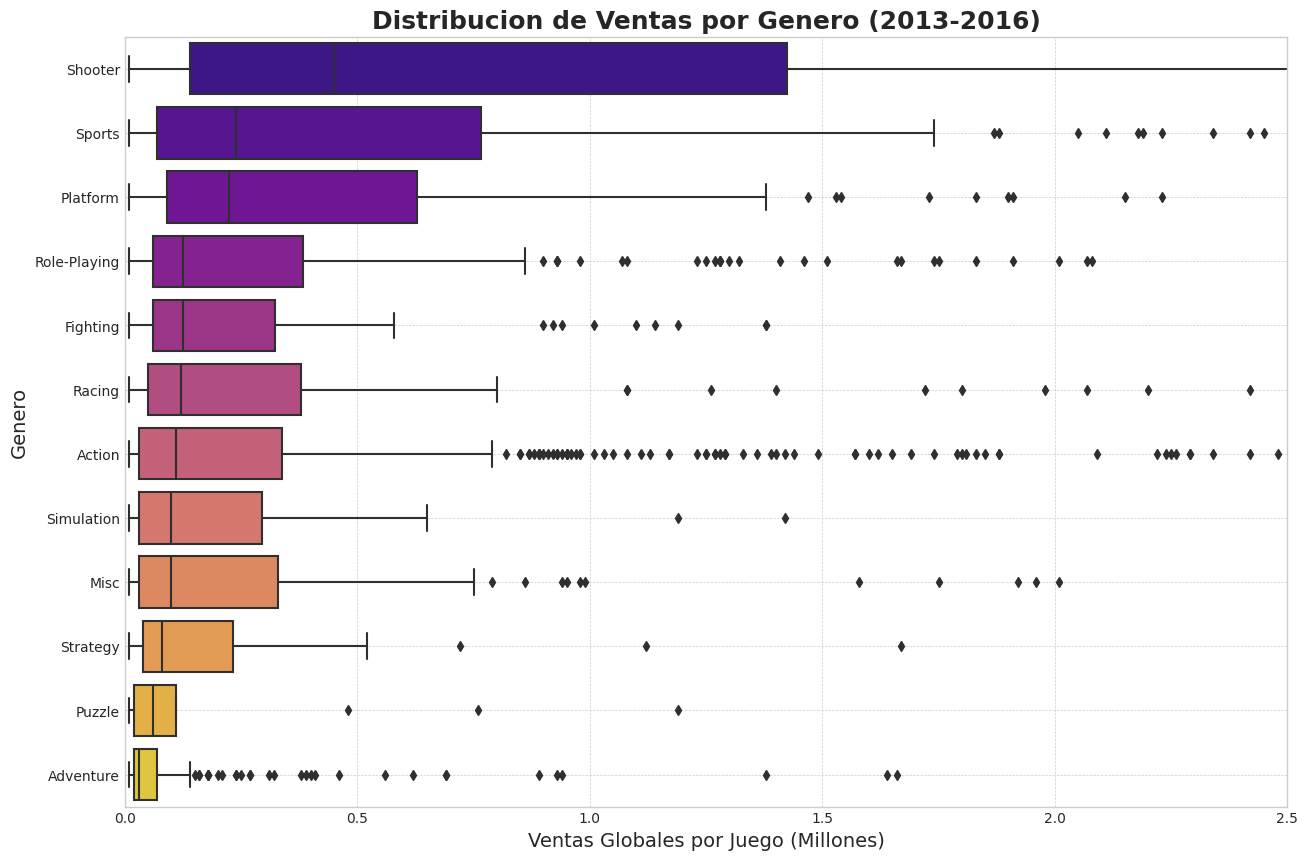

In [ ]:
# Rentabilidad : Distribucionde ventas por genero
sorted_genres = df_relevant.groupby('genre')['total_sales'].median().sort_values(ascending=False).index
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15,10))
sns.boxplot(x='total_sales',y='genre',data=df_relevant,order=sorted_genres,palette='plasma')
plt.title('Distribucion de Ventas por Genero (2013-2016)',fontsize=18,weight='bold')
plt.xlabel('Ventas Globales por Juego (Millones)',fontsize=14)
plt.ylabel('Genero',fontsize=14)
plt.xlim(0,2.5)
plt.grid(True, which='both',linestyle='--',linewidth=0.5)
plt.show()

In [ ]:
¿Puedes generalizar acerca de los géneros con ventas altas y bajas? Los generos mas rentables
Shooter: Indiscutiblemente este genero de juego de disparo venden mucho mas que los demas generos, es un genero de alto rendimiento.
Deportes: Ocupa el sengudo lugar, este genereo regularmente son lanzados anualmente, todo indica que tienen una larga lista de fans
esto hace que generan grandes ventas.
Plataformas: Este genero sorprendentemente tiene un median de ventas saludable. Esto significa que los juegos de plataformas
tienen un gran atractiv comercial tambien.

Ventas Bajas : el genero de Adventur a pezar de tener el 3 lugar con mas lanzamientos, es el que tiene una mediana de ventas bajas
esto nos dice que el mercado de juegos de aventura esta algo saturado.
Strategy (puzzle y estrategia) Estos son de generos de nicho. Tienen menos lanzamientos y , en general un juego en esta categoria vende
menos que los generos mas populares.

**Perfil de América del Norte (NA)**

In [ ]:
print('---Perfil de Usuario: America del Norte NA---')
na_platforms = df_relevant.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
print('---Top 5 Plataformas en NA (venta millones)---')
print(na_platforms)
print('\n')

# Los 5 generos principales en NA
na_genres = df_relevant.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
print('---Top 5 Generos en NA (venta en millones)---')
print(na_genres)
print('\n')

# Impacto de las clasificaciones de ESRB en NA
na_ratings = df_relevant.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head(5)
print('---Ventas por clasificacion ESRB en NA---')
print(na_ratings)

---Perfil de Usuario: America del Norte NA---
---Top 5 Plataformas en NA (venta millones)---
platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64


---Top 5 Generos en NA (venta en millones)---
genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64


---Ventas por clasificacion ESRB en NA---
rating
M       165.21
NR       89.42
E        79.05
E10+     54.24
T        49.79
Name: na_sales, dtype: float64


**Perfil de Europa (EU)**

In [ ]:
print('---Perfil de Usuario: Europa (EU)---')
eu_platforms = df_relevant.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
print('---Top 5 Plataformas en EU (venta en millones)---')
print(eu_platforms)
print('\n')

# Los 5 Generos principales en EU
eu_genres = df_relevant.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
print('---Top 5 Generos en EU (venta en millones)---')
print(eu_genres)
print('\n')

#Impacto de la clasificacion en ESRB en EU
eu_ratings = df_relevant.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head(5)
print('---Ventas por clasificacion ESRB en EU---')
print(eu_ratings)

---Perfil de Usuario: Europa (EU)---
---Top 5 Plataformas en EU (venta en millones)---
platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64


---Top 5 Generos en EU (venta en millones)---
genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64


---Ventas por clasificacion ESRB en EU---
rating
M       145.32
E        83.36
NR       78.91
E10+     42.69
T        41.95
Name: eu_sales, dtype: float64


**Perfil de Japón (JP)**

In [ ]:
print('---Perfil de Usuario: Japon (JP)---')
jp_platforms = df_relevant.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
print('---Top 5 Plataformas en JP (venta en millones)---')
print(jp_platforms)
print('\n')

# Los 5 Generos principales de JP
jp_genres = df_relevant.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
print('---Top 5 Generos en JP (venta en millones)---')
print(jp_genres)
print('\n')

# Impacto de las clasficaciones de ESRB en JP
jp_ratings = df_relevant.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head(5)
print('---Ventas por clasificacion ESRB en JP---')
print(jp_ratings)

---Perfil de Usuario: Japon (JP)---
---Top 5 Plataformas en JP (venta en millones)---
platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64


---Top 5 Generos en JP (venta en millones)---
genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64


---Ventas por clasificacion ESRB en JP---
rating
NR      85.05
T       20.59
E       15.14
M       14.11
E10+     5.89
Name: jp_sales, dtype: float64


**Hipótesis 1: Calificaciones de Usuarios de Xbox One vs. PC**


In [ ]:
from scipy import stats

# Crear 2 muestras de datos: una para Xbox One y otra para PC

xone_scores = df_relevant[df_relevant['platform']== 'XOne']['user_score'].dropna()
pc_scores = df_relevant[df_relevant['platform']== 'PC']['user_score'].dropna()


# Alpha
alpha = 0.05

# Realizar la pueba t de Student para muestras independientes
# Primero verificaremos si las varianzas son iguales
# Si el p-value de Levende es > 0.05, asumimos varianza iguales.
levene_stat, levene_p = stats.levene(xone_scores,pc_scores)
equal_variances = levene_p > alpha

# Realizar el t-test
results = stats.ttest_ind(xone_scores,pc_scores,equal_var=equal_variances)
print(f"Hipotesis Nula (H₀): Las calificaciones promedio de los usuarios para Xbox One y PC son las mimas.")
print(f"Hipotesis Alternativa (H₁): Las calificaciones alternas promedio de los usuarios para Xbox One Y PC son diferentes")
print("-" * 50)
print(f"Calificacion promedio de usuarios para Xbox One:{xone_scores.mean():.2f}")
print(f"Calificacion promedio de usuarios para PC: {pc_scores.mean():.2f}")
print(f"Valos p obtenido de la prueba t:{results.pvalue:.4f}")
print(f"Nivel de significancia (alpha):{alpha}")
print("--" * 50)

if results.pvalue < alpha:
    print("Conclusion: Rechazamos la Hipotesis nula")
    print("Existe una diferencia estadisticamente significativa entre las calificaciones promedio de los usuarios de Xbox One y PC.")
else:
    print("Conclusion: No podemos rechazar la hupotesis nula.")
    print("No hay evidencia estadistica suficiente para afirmar que las calificaciones promedio de los usuarios de Xbox One y PC son diferentes.")


Hipotesis Nula (H₀): Las calificaciones promedio de los usuarios para Xbox One y PC son las mimas.
Hipotesis Alternativa (H₁): Las calificaciones alternas promedio de los usuarios para Xbox One Y PC son diferentes
--------------------------------------------------
Calificacion promedio de usuarios para Xbox One:6.52
Calificacion promedio de usuarios para PC: 6.27
Valos p obtenido de la prueba t:0.1476
Nivel de significancia (alpha):0.05
----------------------------------------------------------------------------------------------------
Conclusion: No podemos rechazar la hupotesis nula.
No hay evidencia estadistica suficiente para afirmar que las calificaciones promedio de los usuarios de Xbox One y PC son diferentes.


**Hipótesis 2: Calificaciones de Usuarios para los Géneros de Acción vs. Deportes**

In [ ]:
from scipy import stats

# Creacion de 2 muestras de datos: pra el genero Accion y otra Deportes
action_scores = df_relevant[df_relevant['genre']== 'Action']['user_score'].dropna()
sports_scores = df_relevant[df_relevant['genre']== 'Sports']['user_score'].dropna()

# Alpha
alpha =0.05

# Realizar la pueba t de student para muestas independientes
# Verificamos la igualdad de varianza para determinar que pueba t usar.
levene_stat,levene_p = stats.levene(action_scores,sports_scores)
equal_variances = levene_p > alpha

results = stats.ttest_ind(action_scores,sports_scores,equal_var=equal_variances)
print(f"Hipotesis Nula (H₀): Las calificaciones promedio de los usuarios para los generos de Accion y Deportes son las mismas.")
print(f"Hipotesis Alternativa (H₁): Las calificaciones promedio de los usuarios para los generos de Accion y Deportes son diferentes.")
print("-" * 80)
print(f"Calificacion promedio de usuarios para el genero de Accion: {action_scores.mean():.2f}")
print(f"Calificacion promedio de usuarios para el genero de Deportes: {sports_scores.mean():.2f}")
print(f"Valor p obtenido de la prueba t: {results.pvalue}")
print(f"Nivel de significancia (alpha): {alpha}")
print("-" * 80)

if results.pvalue < alpha:
    print("Conclusion: Rechazamos la hipotesis nula.")
    print("Existe una diferencia estadisticamente significativa entre las calificaciones promedio de los usuarios para los generos de Accion y Deporte.")
else:
    print("Conclusion: No podemos rechazar la hipotesis nula.")
    print("No hay evidencia estadistica suficiente para afirmar que las calificaciones promedio de los usuarios para los generos de Accion y Deportes son diferentes.")


Hipotesis Nula (H₀): Las calificaciones promedio de los usuarios para los generos de Accion y Deportes son las mismas.
Hipotesis Alternativa (H₁): Las calificaciones promedio de los usuarios para los generos de Accion y Deportes son diferentes.
--------------------------------------------------------------------------------
Calificacion promedio de usuarios para el genero de Accion: 6.84
Calificacion promedio de usuarios para el genero de Deportes: 5.24
Valor p obtenido de la prueba t: 1.4460039700704315e-20
Nivel de significancia (alpha): 0.05
--------------------------------------------------------------------------------
Conclusion: Rechazamos la hipotesis nula.
Existe una diferencia estadisticamente significativa entre las calificaciones promedio de los usuarios para los generos de Accion y Deporte.


In [ ]:
Cómo formulaste las hipótesis nula y alternativa.
se formularion de la siguiente manera :

Para el ejemplo de las calificaciones Xbox One y PC.
Hipotesis Nula (H₀): (μ_xone = μ_pc)
Hipotesis Alternativa (H₁) : (μ_xone ≠ μ_pc)

Para el ejemplo de las calificaciones de Accion y Deportes.
Hipotesis Nula (H₀) : (μ_accion = μ_deporte)
Hipotesis Alternativa (H₁) : ((μ_accion ≠ μ_deportes))

Qué criterio utilizaste para probar las hipótesis y por qué.

Se utilizo la prueba t de Student para muestas independientes, por que queriamos comparar los promedios, el objetivo era comparar la calificacion promedio de 2 grupos
y la puebra t cumplia el criterio. Se compararon 2 grupos en cada hipotesis (Xbox One vs PC y Accion vs Deportes)
Las muestras eran independientes, las calificaciones de los juegos Xbox One no tenia relacion ni afentan las calificaciones de los juegos de PC. Lo mismo
ocurre con los generes de Accion y Deportes. Y por ultimo los datos eran numericos, las calificaciones de los usuarios son datos numericos continuos, que es el
tipo de dato que requiere la prueba.

Se establecio un nivel de significancia (alpha) de 0.05 esto es el estandar en estadisticas y significa que si el (valor_p) de que la diferencia
por casualidad es menos al 5%, rechazamos la hipotesis nula y se concluye que la direfencia es real.


In [ ]:
Conclusion:
    Despues un analisis de datos de venta de videojuegos se descubrio que el mercado de consolas ha cambiado drasticamente,descubrimos que
los reyes actualares son el PlayStation 4 y el Xbox One son las plataformas dominastes y con mayor potencial de ventas. La PS4 es la lider
mundial indiscutible, especialmente en Europa. Por otro lado en Japon , el mercado es algo diferente, el exito se encuentra en las consolas
portatiles, principalmente el Nintendo 3DS.
    En el caso de las ventas los Shooter (Disparos) y Deportes son las apuestas mas seguras. El juego promedio en estas categorias venden
significativamente mas que en cualquiera. El genero de Accion como descrubrimos es el mas comun , pero tambien el mas comptetitivo. El de
aventura tiene muchos lanzamientos, pero la mayoria de ellos vende pocos.
    Nuestros datos muestran 3 perfiles de jugador distintos: Norteamerica y Europa: estos son muy similares. Aman la accion intensa en sus
consolas (PS4 y XOne) Los juegos mas vendidos son Accion y Shooter. Por otro lado Japon es un universo aparte. Prefieron las experiencias
portatiles (3DS) y los generos locales como los Juegos de Rol (Role-Playing). La clasificacion ESRB es irrelevantes para ellos.